## 1. Data

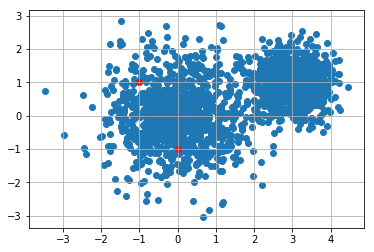

In [7]:
import numpy as np
import matplotlib.pyplot as plt

X_data = np.load('data.npy')

plt.figure()
plt.scatter(X_data[:, 0], X_data[:, 1])
plt.scatter(mu[0][0], mu[0][1], color='red')
plt.scatter(mu[1][0], mu[1][1], color='red')
plt.grid()

In [3]:
len(X_data)

2000

## 2. K-means

#### Assume that k=2

In [4]:
k = 2

#### Step1 ) Take initial center

1. randomly (SKIP)

In [5]:
index = np.random.randint(0, len(X_data), size=k)
mu = X_data[index]

2. fixed

In [6]:
mu = np.array([[-1,1], [0,-1]])

#### Step2 ) Clustering

In [8]:
a = np.sqrt(np.sum((X_data - mu[0])**2, axis=1))

In [9]:
b = np.sqrt(np.sum((X_data - mu[1])**2, axis=1))

In [10]:
a = np.sqrt(np.sum((X_data - mu[0])**2, axis=1)).reshape(-1,1)
b = np.sqrt(np.sum((X_data - mu[1])**2, axis=1)).reshape(-1,1)
dist = np.vstack([a.T, b.T])
dist

array([[3.72683028, 1.37579072, 2.36843527, ..., 1.88853397, 3.79418002,
        1.49467471],
       [3.13812441, 1.54839393, 1.52749319, ..., 0.87209649, 4.07897434,
        0.76122153]])

In [11]:
cluster = np.argmin(dist, axis=0)
cluster

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

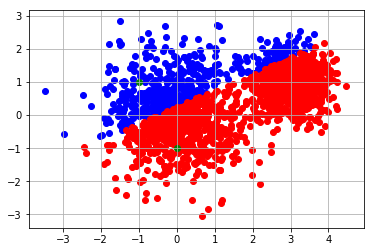

In [12]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X_data[cluster==0][:,0], X_data[cluster==0][:,1], c='b')
plt.scatter(X_data[cluster==1][:,0], X_data[cluster==1][:,1], c='r')
plt.scatter(mu[0][0], mu[0][1], color='green')
plt.scatter(mu[1][0], mu[1][1], color='green')
plt.grid()

#### Step3 ) Find new center

In [14]:
np.mean(X_data[cluster==1], axis=0)

array([1.89691599, 0.32614945])

In [15]:
mu = []
for l in range(k):
    mu.append(np.average(X_data[cluster==l], axis=0))
mu

[array([0.21169294, 1.00720503]), array([1.89691599, 0.32614945])]

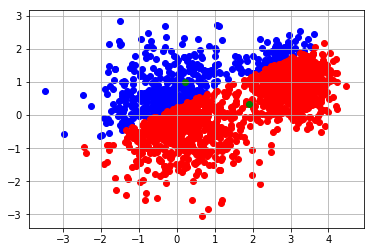

In [16]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X_data[cluster==0][:,0], X_data[cluster==0][:,1], c='b')
plt.scatter(X_data[cluster==1][:,0], X_data[cluster==1][:,1], c='r')
plt.scatter(mu[0][0], mu[0][1], color='green')
plt.scatter(mu[1][0], mu[1][1], color='green')
plt.grid()

#### Check : Is J properly decreasing?

In [10]:
J = np.sum((np.min(dist, axis=0))**2)
print(J)

14703.940944081667


## Exercise1 : Assume that the number of clustering k=2 and iterations =10

In 1 iteration : 14703.940944081667
In 2 iteration : 4410.362840352019
In 3 iteration : 2179.947866819939
In 4 iteration : 2029.2697529468198
In 5 iteration : 2025.0239793280366
In 6 iteration : 2024.4772461457235
In 7 iteration : 2024.4772461457235
In 8 iteration : 2024.4772461457235
In 9 iteration : 2024.4772461457235
In 10 iteration : 2024.4772461457235


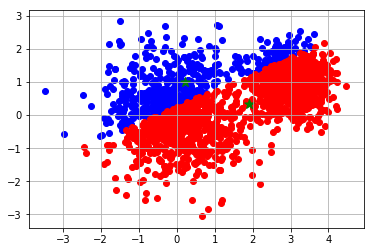

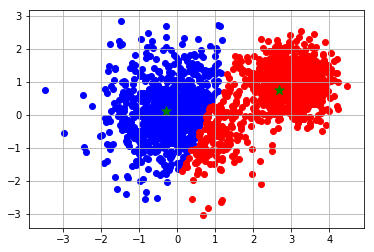

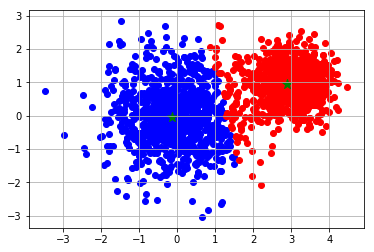

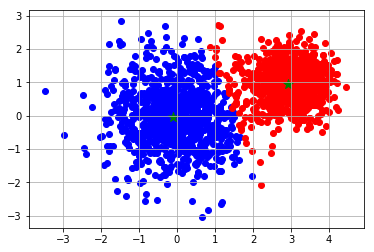

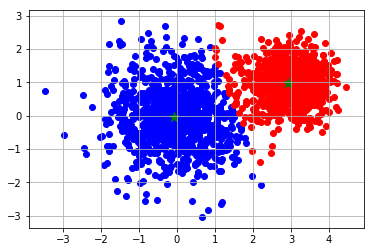

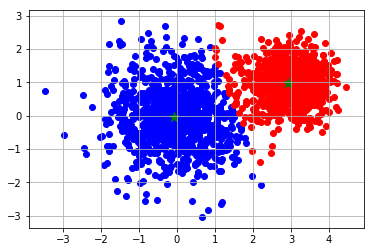

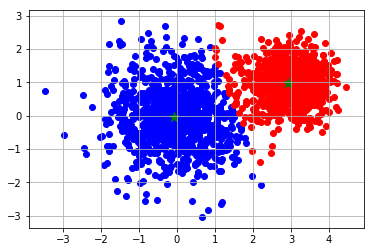

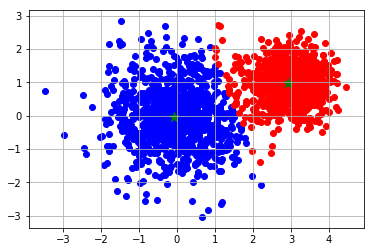

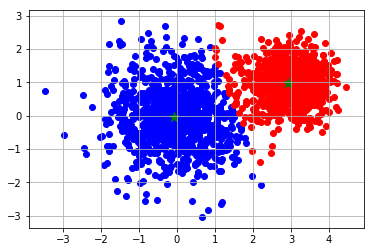

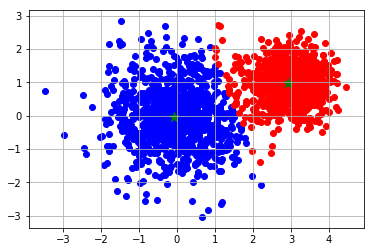

In [17]:
import numpy as np
import matplotlib.pyplot as plt

X_data = np.load('data.npy')


# parameters
k = 2
iterations = 10




#step1) initialize center
mu = np.array([[-1,1], [0,-1]])


for i in range(iterations):

    
    #step2) clustering
    a = np.sqrt(np.sum((X_data - mu[0])**2, axis=1)).reshape(-1,1)
    b = np.sqrt(np.sum((X_data - mu[1])**2, axis=1)).reshape(-1,1)
    dist = np.vstack([a.T, b.T])
    cluster = np.argmin(dist, axis=0)

    
    #step3) find new center
    mu = []
    for l in range(k):
        mu.append(np.average(X_data[cluster==l], axis=0)) 
    
    
    #print loss
    J = np.sum((np.min(dist, axis=0))**2)
    print("In", i+1,"iteration :",J)
    
    #draw picture
    plt.figure()
    plt.scatter(X_data[cluster==0][:,0], X_data[cluster==0][:,1], c='b')
    plt.scatter(X_data[cluster==1][:,0], X_data[cluster==1][:,1], c='r')
    plt.scatter(mu[0][0],mu[0][1], color ='green', marker="*", s=100 )
    plt.scatter(mu[1][0],mu[1][1], color ='green', marker="*", s=100 )
    plt.grid()